In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files= !unzip /content/drive-download-20210530T124440Z-001.zip

In [3]:
files

['Archive:  /content/drive-download-20210530T124440Z-001.zip',
 'replace uber-raw-data-apr14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y',
 '  inflating: uber-raw-data-apr14.csv  ',
 'replace uber-raw-data-jun14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y',
 '  inflating: uber-raw-data-jun14.csv  ',
 'replace uber-raw-data-may14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y',
 '  inflating: uber-raw-data-may14.csv  ',
 'replace uber-raw-data-aug14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y',
 '  inflating: uber-raw-data-aug14.csv  ',
 'replace uber-raw-data-jul14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ',
 'error:  invalid response [{ENTER}]',
 'replace uber-raw-data-jul14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y',
 '  inflating: uber-raw-data-jul14.csv  ',
 'replace uber-raw-data-sep14.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y',
 '  inflating: uber-raw-data-sep14.csv  ']

In [15]:
df1=pd.read_csv('uber-raw-data-apr14.csv')
df2=pd.read_csv('uber-raw-data-aug14.csv')
df3=pd.read_csv('uber-raw-data-jul14.csv')
df4=pd.read_csv('uber-raw-data-jun14.csv')
df5=pd.read_csv('uber-raw-data-may14.csv')
df6=pd.read_csv('uber-raw-data-sep14.csv')

In [16]:
df6

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [17]:
df = pd.concat([df1,df2,df3,df4,df5,df6])


In [18]:
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [19]:
df.shape

(4534327, 4)

In [20]:
df.columns


Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [21]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [22]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format="%m/%d/%Y %H:%M:%S")

In [23]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [24]:
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [26]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0


In [27]:
df['Base'].unique

<bound method Series.unique of 0          B02512
1          B02512
2          B02512
3          B02512
4          B02512
            ...  
1028131    B02764
1028132    B02764
1028133    B02764
1028134    B02764
1028135    B02764
Name: Base, Length: 4534327, dtype: object>

In [28]:
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

###Analysis of rush by day


In [29]:
import plotly.express as px

In [30]:
df['weekday'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

In [31]:
px.bar(x=df['weekday'].value_counts().index,
      y=df['weekday'].value_counts().values
      )

From this visual we can conclude that the rush is high in thursday

###***Analysis of rush by hour***




In [33]:
df['hour'].value_counts()

17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
Name: hour, dtype: int64

In [35]:
df['hour'].value_counts().index

Int64Index([17, 18, 16, 19, 20, 21, 15, 22, 14, 13,  7,  8, 12, 23, 11,  9, 10,
             6,  0,  5,  1,  4,  3,  2],
           dtype='int64')

In [36]:
px.bar(x=df['hour'].value_counts().index,
      y=df['hour'].value_counts().values
      )

###**Peak hour with respect to month**

In [41]:
for i,month in enumerate(df['month'].unique()):
    print(month)

4
8
7
6
5
9


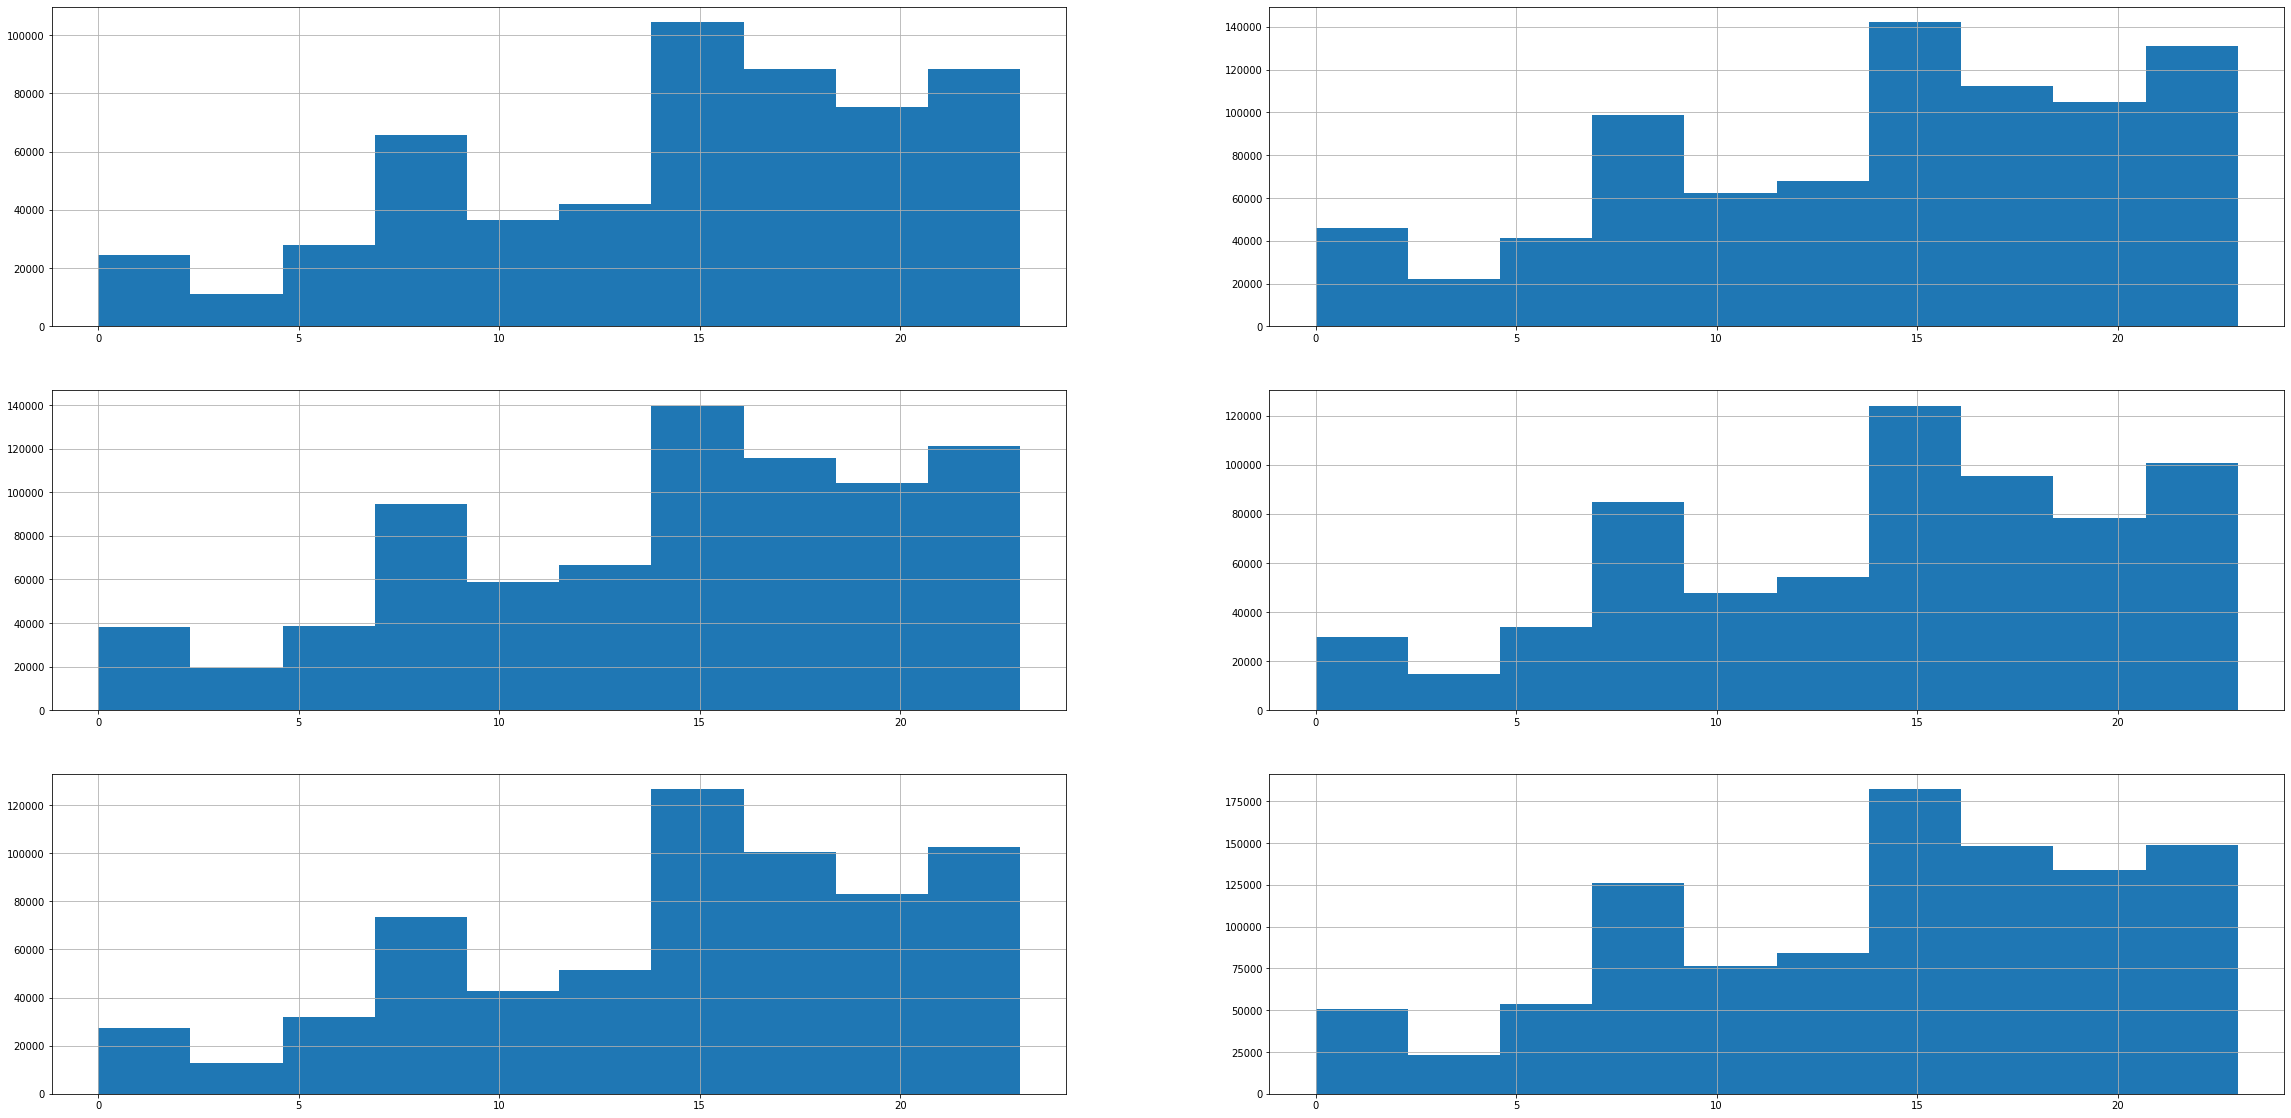

In [42]:

plt.figure(figsize=(40,20))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    df[df['month']==month]['hour'].hist()


By this we can conclude that the ride is maximum by evening hours

###**Which month has the maximum ride**

In [44]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [45]:
trace1 = go.Bar( 
        x = df.groupby('month')['hour'].sum().index,
        y = df.groupby('month')['hour'].sum(),
        name= 'Priority')
iplot([trace1])

September has the maximum rides

###**Analysis of journey w.r.t day**

Text(0.5, 1.0, 'Journey w.r.t day')

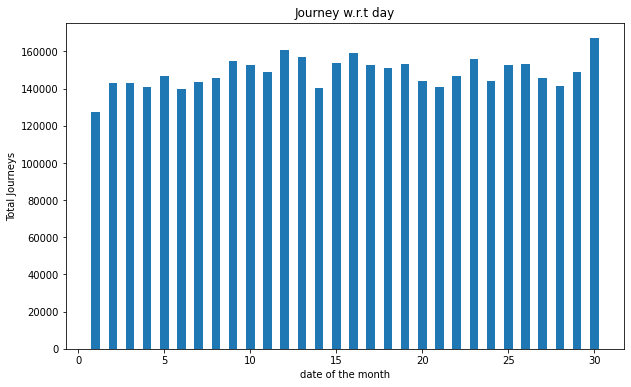

In [53]:
plt.figure(figsize=(10,6))
plt.hist(df['day'], bins=30, rwidth=0.5, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('Total Journeys')
plt.title('Journey w.r.t day')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



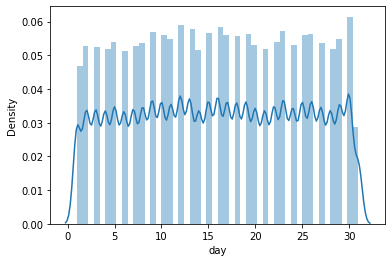

In [55]:
sns.distplot(df['day']) #to check whether the plot is in correct distribution

so the ride is high on 30th day of a month

###**Analysing total rides month rise**

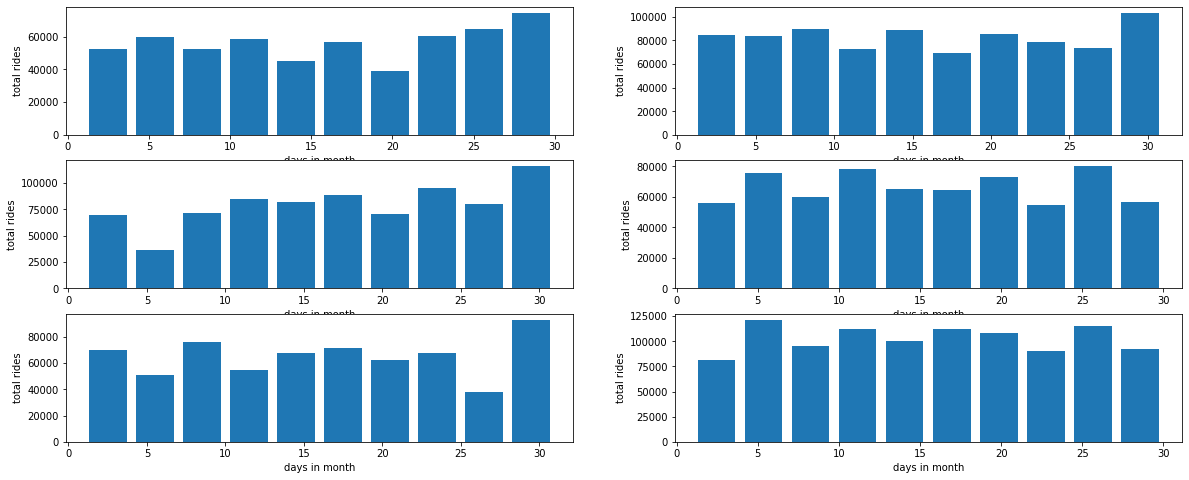

In [63]:
plt.figure(figsize=(20,8))
for i,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,i)
    df_out=df[df['month']==month]
    plt.hist(df_out['day'],rwidth=0.8)
    plt.xlabel('days in month'.format(i))
    plt.ylabel('total rides')

Almost in everymonth last day have most rides

###**Analysis of rush w.r.t hour and lat**




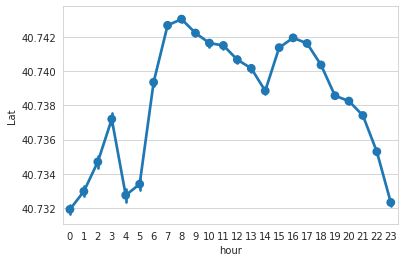

In [65]:
sns.set_style(style='whitegrid')
sns.pointplot(x="hour",y="Lat",data=df)

###**Analysis of rush w.r.t hour and lat by adding hue params**




Text(0.5, 1.0, 'hours of fday vs latitude of passenger')

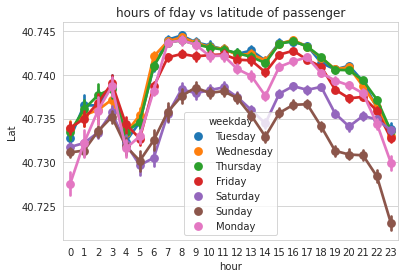

In [66]:
ax=sns.pointplot(x="hour",y="Lat", hue="weekday",data=df)
ax.set_title('hours of fday vs latitude of passenger')

###**Analyse which base number gets popular by month**

In [68]:
df.groupby(['Base','month'])['Date/Time'].count()

Base    month
B02512  4         35536
        5         36765
        6         32509
        7         35021
        8         31472
        9         34370
B02598  4        183263
        5        260549
        6        242975
        7        245597
        8        220129
        9        240600
B02617  4        108001
        5        122734
        6        184460
        7        310160
        8        355803
        9        377695
B02682  4        227808
        5        222883
        6        194926
        7        196754
        8        173280
        9        197138
B02764  4          9908
        5          9504
        6          8974
        7          8589
        8         48591
        9        178333
Name: Date/Time, dtype: int64

In [71]:

base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


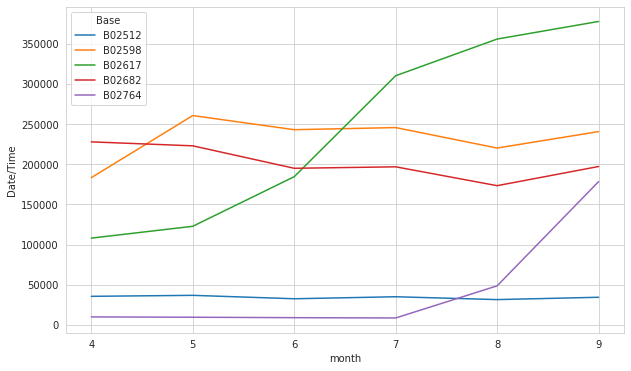

In [72]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=base)

B02617 gets more popular with month

###Cross Analysis




In [73]:
def count_rows(rows):
    return len(rows)

In [74]:
cross = df.groupby(['weekday','hour']).apply(count_rows)
cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [78]:
pivot=cross.unstack()#  to get the pivot table

In [79]:
pivot

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,24176,25188,25907,30341,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,20288,20333,20488,23385,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,20596,22718,24298,26636,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,19839,22856,23911,26417,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,25877,25966,26465,30840,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,23676,23679,23850,29075,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,24696,24963,25533,29183,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


###**creating heatmap so that it can be easily visualize**

Heatmap by Hour and Weekday (for finding in which weekday and in which hour the rush is maximum or in peak)

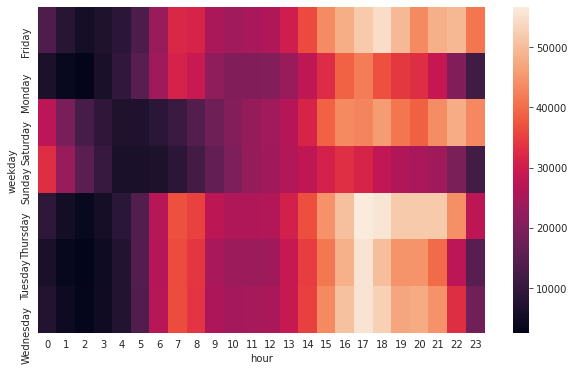

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=False)

This shows rush is max in evening time

In [83]:
def heatmap(col1,col2):
    cross = df.groupby([col1,col2]).apply(lambda x:len(x))
    pivot=cross.unstack()
    plt.figure(figsize=(10,6))
    return sns.heatmap(pivot,annot=False)

Heatmap by Hour and Weekday.

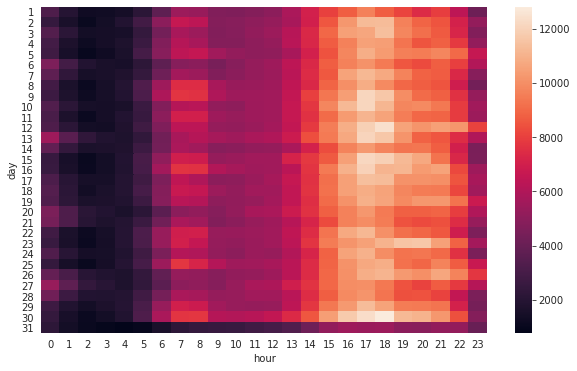

In [87]:
heatmap('day','hour')

So its clear in midnights we dont have any kind of rush

Heatmap by Month and Day


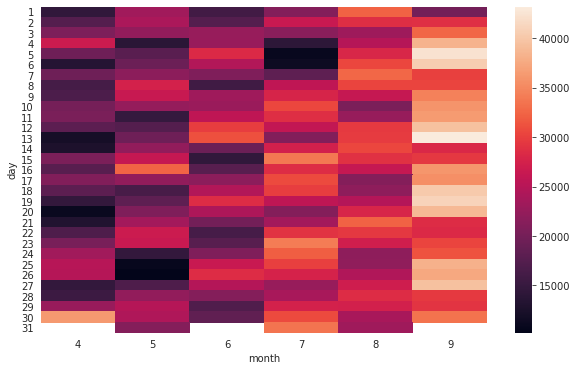

In [88]:
heatmap('day','month')

Heatmap by Month and Weekday.


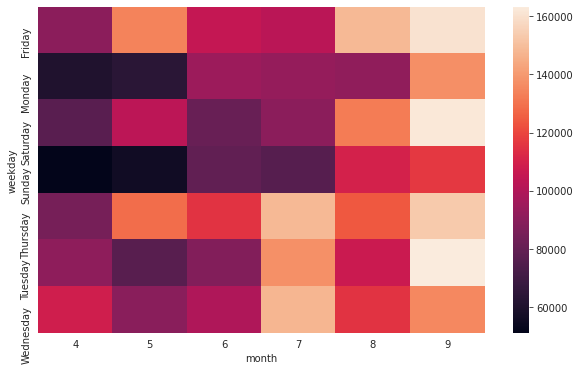

In [89]:
heatmap('weekday','month')

In [90]:
df[df['month']==4]

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,1,11,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,1,17,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,1,21,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,1,28,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,1,33,4,0
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,30,22,4,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,30,26,4,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,30,31,4,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,30,32,4,23


#### Analysis of Location data points

(40.6, 41.0)

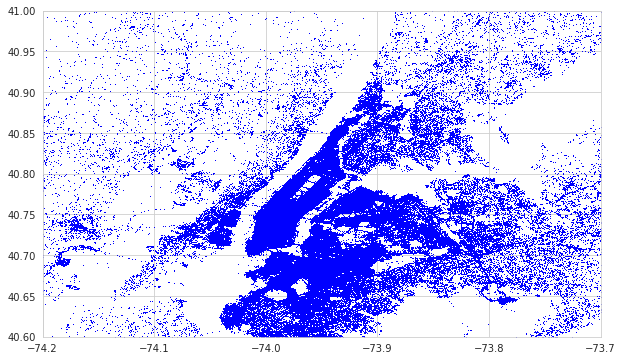

In [92]:
plt.figure(figsize=(10,6))

plt.plot(df['Lon'], df['Lat'],'b+', ms=0.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.6,41)

We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot(rush is high) & these are made from Midtown to Lower Manhattan.
Followed by Upper Manhattan and the Heights of Brooklyn.